In [93]:
import pandas as pd
data = pd.read_csv('loan_approval_dataset.csv')
print(data.head())


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [95]:
data['total_assets_value'] = (data[' residential_assets_value'] + data[' commercial_assets_value'] +
                            data[' luxury_assets_value'] + data[' bank_asset_value'])

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data[' education'] = le.fit_transform(data[' education'])


dict(zip(le.classes_, le.transform(le.classes_)))

{' Graduate': 0, ' Not Graduate': 1}

In [97]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data[' self_employed'] = le.fit_transform(data[' self_employed'])


dict(zip(le.classes_, le.transform(le.classes_)))

{' No': 0, ' Yes': 1}

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,total_assets_value
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,50700000
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,17000000
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,57700000
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,52700000
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,55000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected,7400000
4265,4266,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved,20000000
4266,4267,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected,39000000
4267,4268,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved,28800000


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[[ ' income_annum', ' loan_amount']] = scaler.fit_transform(data[[ ' income_annum', ' loan_amount']])


In [100]:

data['debt_to_income_ratio'] = data[' loan_amount'] / data[' income_annum']

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['loan_status'] = le.fit_transform(data[' loan_status'])


dict(zip(le.classes_, le.transform(le.classes_)))

{' Approved': 0, ' Rejected': 1}

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
data_pca = pca.fit_transform(data.drop(columns=[' loan_status'])) 

In [103]:
pca_df = pd.DataFrame(data=data_pca, columns=['PC1', 'PC2','PC3','PC4','PC5'])

c:\Users\Meera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Meera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Meera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Meera\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

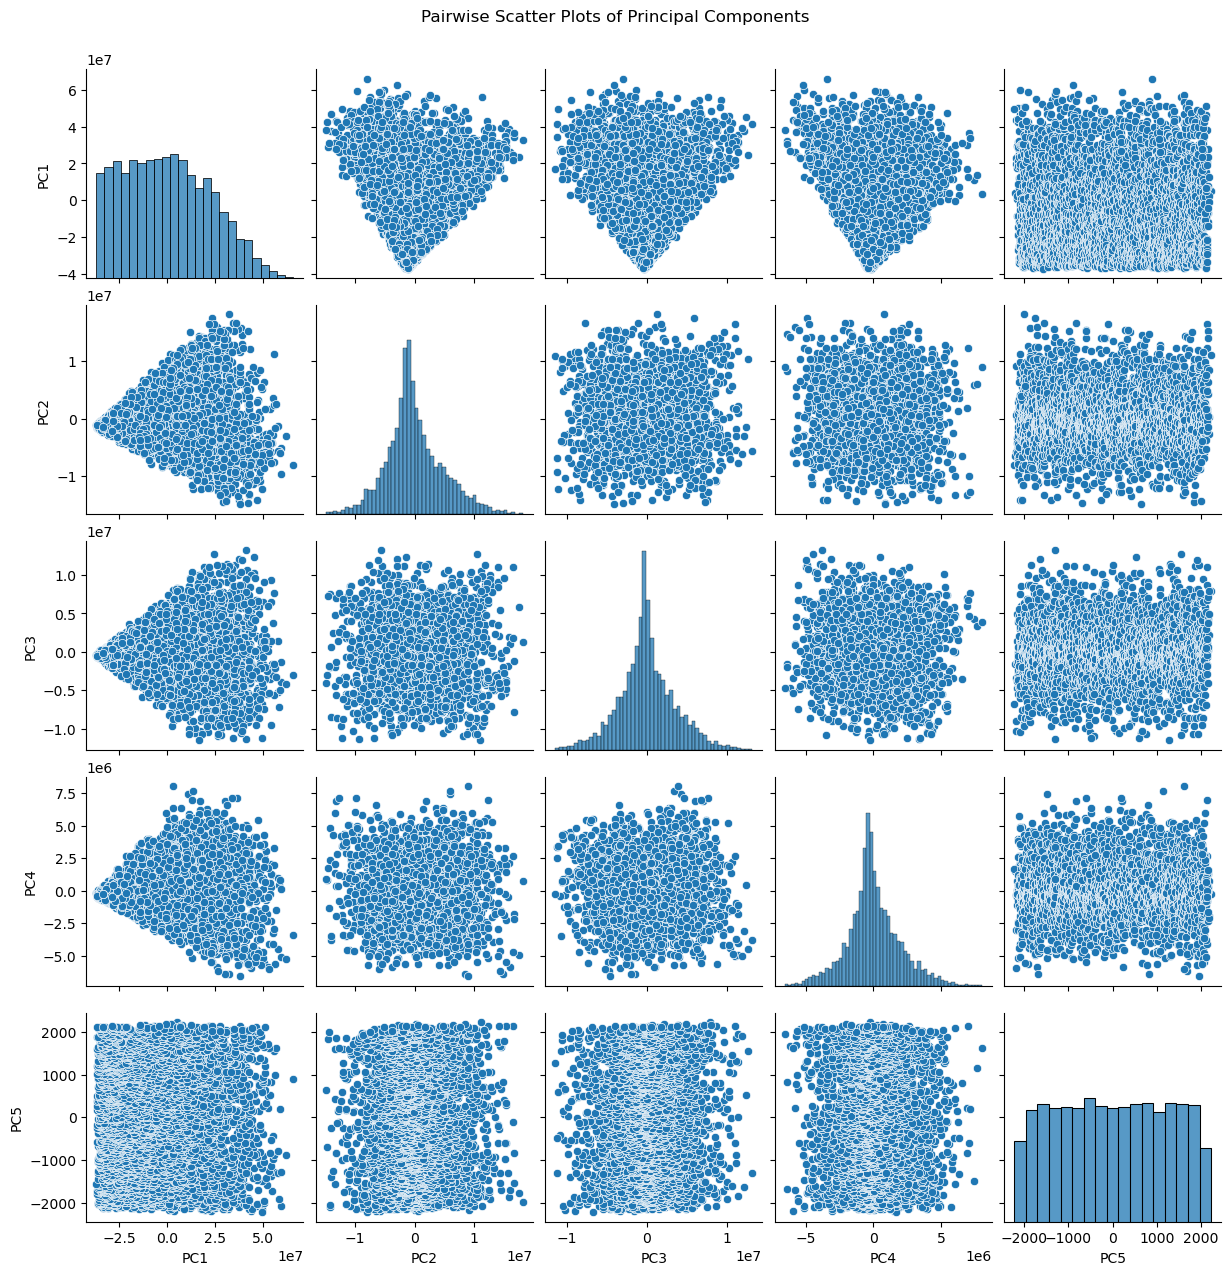

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(pca_df)
plt.suptitle('Pairwise Scatter Plots of Principal Components', y=1.02)
plt.show()

In [105]:
columns_to_drop = ['loan_id',' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']
data = data.drop(columns=columns_to_drop)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,total_assets_value,debt_to_income_ratio,loan_status
0,2,0,0,1.617979,1.633052,12,1.032792,50700000,1.009316,0
1,0,1,1,-0.341750,-0.324414,8,-1.061051,17000000,0.949274,1
2,3,0,0,1.439822,1.610933,20,-0.544840,57700000,1.118842,1
3,3,0,0,1.119139,1.721525,8,-0.771045,52700000,1.538258,1
4,5,1,1,1.689242,1.002681,20,-1.264055,55000000,0.593569,1
...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,-1.446324,-1.419268,12,-1.641063,7400000,0.981293,1
4265,0,1,1,-0.626801,-0.423946,20,-0.237434,20000000,0.676365,0
4266,2,1,0,0.513405,0.969504,18,-0.829046,39000000,1.888381,1
4267,1,1,0,-0.341750,-0.258059,8,1.044393,28800000,0.755112,0


In [107]:
X = data.drop('loan_status', axis=1)
y = data['loan_status']


In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [109]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [110]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


y_pred = clf.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       810
           1       1.00      0.99      0.99       471

    accuracy                           1.00      1281
   macro avg       1.00      1.00      1.00      1281
weighted avg       1.00      1.00      1.00      1281

Confusion Matrix:
[[808   2]
 [  3 468]]


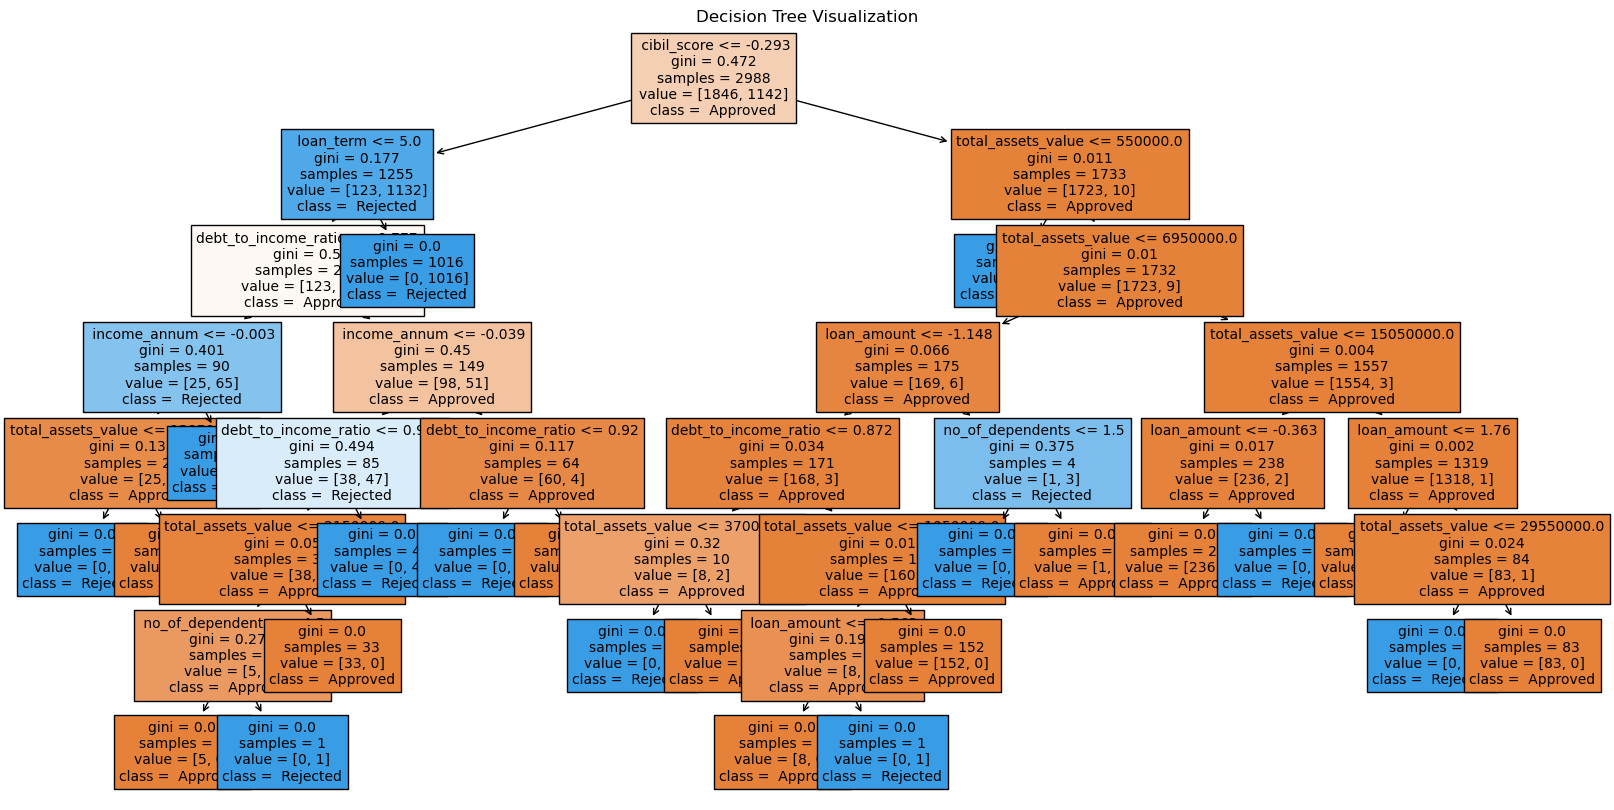

In [111]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=le.classes_, filled=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [112]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)


print(f'Best parameters: {grid_search.best_params_}')
best_clf = grid_search.best_estimator_


y_pred_best = best_clf.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f'Best Accuracy: {accuracy_best:.2f}')


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Accuracy: 0.99


In [127]:
no_of_dependents = int(input("Enter the number of dependents: "))
education = int(input("Enter the education level (e.g., 1 for Graduate, 0 for Not Graduate): "))
self_employed = int(input("Are you self-employed? (1 for Yes, 0 for No): "))
income_annum = int(input("Enter the annual income: "))
loan_amount = int(input("Enter the loan amount: "))
loan_term = int(input("Enter the loan term (in years): "))
cibil_score = float(input("Enter the CIBIL score: "))
total_assets_value = int(input("Enter the total assets value: "))

new_application = pd.DataFrame({
    ' no_of_dependents': [no_of_dependents],
    ' education': [education],
    ' self_employed': [self_employed],
    ' income_annum': [income_annum],
    ' loan_amount': [loan_amount],
    ' loan_term': [loan_term],
    ' cibil_score': [cibil_score],
    'total_assets_value': [total_assets_value],
})

In [128]:
prediction = clf.predict(new_application)



In [129]:
loan_status = le.inverse_transform(prediction)
print(f'The predicted loan status is: {loan_status[0]}')

The predicted loan status is:  Approved


In [130]:
import numpy as np


decision_path = clf.decision_path(new_application)
leaf_index = clf.apply(new_application)
print(f'The new application reaches leaf node: {leaf_index[0]}')
from sklearn.tree import _tree
tree = clf.tree_
feature_names = X.columns

def print_leaf_values(tree, feature_names):
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree.feature
    ]

    def recurse(node):
        if tree.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[tree.feature[node]]
            threshold = tree.threshold[node]
            print(f"node {node}: {name} <= {threshold:.2f}")
            recurse(tree.children_left[node])
            recurse(tree.children_right[node])
        else:
            print(f"node {node}: leaf node, value = {tree.value[node]}")

    recurse(0)

print_leaf_values(tree, feature_names)

The new application reaches leaf node: 35
node 0: undefined! <= -0.29
node 1: undefined! <= 5.00
node 2:  income_annum <= 0.78
node 3:  income_annum <= -0.00
node 4: undefined! <= 13950000.00
node 5: leaf node, value = [[0. 2.]]
node 6: leaf node, value = [[25.  0.]]
node 7: leaf node, value = [[ 0. 63.]]
node 8:  income_annum <= -0.04
node 9:  income_annum <= 0.93
node 10: undefined! <= 2150000.00
node 11:  cibil_score <= 4.50
node 12: leaf node, value = [[5. 0.]]
node 13: leaf node, value = [[0. 1.]]
node 14: leaf node, value = [[33.  0.]]
node 15: leaf node, value = [[ 0. 46.]]
node 16:  income_annum <= 0.92
node 17: leaf node, value = [[0. 4.]]
node 18: leaf node, value = [[60.  0.]]
node 19: leaf node, value = [[   0. 1016.]]
node 20: undefined! <= 550000.00
node 21: leaf node, value = [[0. 1.]]
node 22: undefined! <= 6950000.00
node 23: total_assets_value <= -1.15
node 24:  income_annum <= 0.87
node 25: undefined! <= 3700000.00
node 26: leaf node, value = [[0. 2.]]
node 27: leaf 